# Projet numérique :câble sous-marin

## Questions théoriques

### 1)

On peut estimer l'espérance condtionnelle par la moyenne empirique de simulations conditionnelles grâce à la <u> loi faible des grands nombres </u> .

### 2)

Soit le vecteur aléatoire $Z_p = (Z(x_0), Z(x_1), ..., Z(x_p)) $ et soit $m_{Z_p}$ son espérance. 

De même on note $m_Z$ l'espérance de $Z$.

Puis on considère le vecteur aléatoire $X=(Z, Z_p)$, 

On considère la matrice de convariance $C_X$ de ce vecteur $X$ . De même on notera $C_Y$ toute matrice de covariance d'un vecteur Y. 

$ C_X= \begin{pmatrix} C_Z&Cov(Z,Z_p) \\ Cov(Z_p, Z)&C_{Z_p} \end{pmatrix}$.

Dans la suite on notera $Cov(Z,Z_p)$ par $C_1$ et  $Cov(Z_p, Z)$ par $C_2$. 

Puis, d'après le cours sur les vecteurs gaussiens, on peut affirmer que :

$Z_{|Z_p=x}$  suit une loi gaussienne ayant pour paramètres:

-Espérance $ m_{Z_{|Z_p=x}} = m_Z + C_{1}C_{Z_p}^{-1} (x-m_{z_p}) $

-Matrice de covariance $C_{Z_{|Z_{p}=x}} = C_Z-C_{1} C_{Z_p}^{-1}C_{2}$


### 3)

Pour commencer, on a que le vecteur aléatoire $Y$ a pour matrice de covariance l'identité. En effet, $Cov(Y_i, Y_j)= \delta_ij$ puisque les $Y_i $ sont indépendants, d'espérance nulle et de variance 1.

Ainsi, en nous appuyant sur le cours, $Z= m+ RY $ suit une loi gaussienne d'espérance $m_Z= m$ et $v_Z =RR^t$ 

### 4) 

En nous appuyant sur la question précédente, on part d'un vecteur aléatoire $Y$ suivant une loi gaussienne centrée-réduite. Pour simuler ce vecteur, on utlisera la méthode de Box_Muller conformément au cours.

On va chercher à exprimer le vecteur $Z$ devant suivre une loi conditionnelle en fonction de $Y$ avec la formule précédente. On rappelle que, ici, $Z$ représente les points de discrétion sans observation connaissant les points de discrétion observés. On notera $X$ le vecteur aléatoire représentant les composantes observées. 

D'après la question 2, $m_ {Z|X=x}=  m_Z + C_{1}C_{Z_p}^{-1} (x-m_X) $ avec $Cov(Z,Z_p) = C_1 $.
On notera cette espérance $m$.

Et  $C_{Z_{|X=x}} = C_Z-C_{1} C_{X}^{-1}C_{2}$ avec $Cov(X, Z)= C_2$. On notera cette covariance $C$.

Puis, en s'appuyant sur la question précédente, il faut trouver une matrice $L$ tel que $LL^t = C$ . On peut trouver une telle matrice grâce à la factorisation de Cholesky. 
Ainsi il suffit de definir $Z$ par $Z= m+LY$

## Questions pratiques

On introduit d'abord les données de l'énoncé. 

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt


 #Discretisation
A = 0
B = 500
N= 101 #Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Parametres du modele
mu = -5
a = 50
sigma2 = 12

#Donnees
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

#Indices des composantes correspondant aux observations et aux composantes non observees
unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))


### 1) 

On commence par écrire une fonction correspondant au cas simple, c'est-à-dire $d$ est un réel positif. On utlise donc simplement les données:

In [7]:
def cov_reel(d, a, sigma2):
    return sigma2 * math.exp(- d / a)

Maintenant, on écrit une autre fonction dans le cas où la distance est une matrice. On se place dans le cas où les distance sont positives. 

On remarquera que cet algorithme est également utilisable si on a une seule distance, en la donnant sous forme de matrice (1,1). 

In [8]:
def cov_matrice(d, a, sigma2):
    resultat= np.zeros(np.shape(d))
    n=len(d)
    p=len(d[0])
    for i in range(n):
        for j in range(p):
            resultat[i][j]= cov_reel(d[i][j], a, sigma2)
    return resultat

### 2)

Pour faciliter le calcul de la matrice, on peut remarquer que la matrice des distances en valeur absolue est symétrique et ne comporte que des zéros sur sa diagonale. On se contente donc de calculer la distance entre deux points $x_j, x_i$ seulement pour $i<j$ puis on complète la matrice. On se place ici dans le cadre où les distances sont toutes positives, donc en valeur absolue, puisque notre algorithme précédent fonctionne dans ce cadre précis.

In [9]:
def calcul_mat_distance(t):
    resultat = np.zeros((len(t), len(t)))
    for i in range (1, len(t)):
        j=0
        while j<i: 
            resultat[i][j] = abs(t[i] - t[j])
            resultat[j][i] = abs(t[i] - t[j])
            j=j+1
    
    return resultat

MAT_DISTANCE= calcul_mat_distance(discretization)
            
MAT_DISTANCE

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

### 3)

On s'appuie sur les fonctions qu'on a déjà défini précédent.

In [10]:
def calcul_mat_cov(t, a, sigma2):
    return cov_matrice(calcul_mat_distance(t), a, sigma2)

MAT_COV_Z = calcul_mat_cov(discretization, a, sigma2)
MAT_COV_Z

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

### 4) 

Pour extraire ma matrice, je créé une matrice de même dimesions qu'il y a d'observations. Ensuite, je parcours la liste d'observation et je récupère les valeurs de MAT_COV_Z correspondants. 

In [11]:
def extrait_cov_obs():
    COV_OBS= np.zeros((len(observation_indexes), len(observation_indexes)))
    
    for (i,x_i) in enumerate(observation_indexes):
        
        for (j, x_j) in enumerate(observation_indexes):
            
            COV_OBS[i][j]= MAT_COV_Z[x_i][x_j]
                
    return COV_OBS

extrait_cov_obs()

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

Pour les inconnus, je procède de la même manière. 

In [12]:
def extrait_cov_inco():
    COV_INCO= np.zeros((len(unknown_indexes), len(unknown_indexes)))
    
    for (i,x_i) in enumerate(unknown_indexes):
        
        for (j, x_j) in enumerate(unknown_indexes):
            
            COV_INCO[i][j]= MAT_COV_Z[x_i][x_j]
                
    return COV_INCO

extrait_cov_inco()

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

On utilise toujours le même principe.

In [13]:
def extrait_cov_inco_obs():
    COV_INCO_OBS= np.zeros((len(unknown_indexes), len(observation_indexes)))
    
    for (i,x_i) in enumerate(unknown_indexes):
        
        for (j, x_j) in enumerate(observation_indexes):
            
            COV_INCO_OBS[i][j]= MAT_COV_Z[x_i][x_j]
                
    return COV_INCO_OBS

extrait_cov_inco_obs()


array([[1.08580490e+01, 1.79482343e+00, 2.42902937e-01, 3.28733378e-02,
        4.44892249e-03, 6.02096185e-04],
       [9.82476904e+00, 1.98358666e+00, 2.68449262e-01, 3.63306569e-02,
        4.91681975e-03, 6.65419193e-04],
       [8.88981865e+00, 2.19220229e+00, 2.96682318e-01, 4.01515855e-02,
        5.43392619e-03, 7.35401941e-04],
       [8.04384055e+00, 2.42275822e+00, 3.27884669e-01, 4.43743646e-02,
        6.00541720e-03, 8.12744838e-04],
       [7.27836792e+00, 2.67756192e+00, 3.62368601e-01, 4.90412573e-02,
        6.63701244e-03, 8.98221959e-04],
       [6.58573963e+00, 2.95916357e+00, 4.00479240e-01, 5.41989713e-02,
        7.33503313e-03, 9.92688787e-04],
       [5.95902365e+00, 3.27038152e+00, 4.42598009e-01, 5.98991269e-02,
        8.10646530e-03, 1.09709078e-03],
       [5.39194757e+00, 3.61433054e+00, 4.89146448e-01, 6.61987730e-02,
        8.95902970e-03, 1.21247282e-03],
       [4.87883592e+00, 3.99445300e+00, 5.40590429e-01, 7.31609588e-02,
        9.90125908e-03, 

### 5)

En s'appuyant sur le cours sur les vecteurs aléatoires gaussiens, on a immédiatement que, en notant $O$ le vecteur des composantes observées et $I$ le vecteur des composantes inconnues: 

$ \mathbb{E} (I_{|O})= \mathbb{E}(I) + Cov(I,O)Cov(O,O)^{-1}(O-\mathbb{E}(O))$

Puis, si on réutilise les notations des précédentes questions on peut écrire que : 

$Cov(O,O) = extrait\_cov\_obs() ,Cov(I,O)= extrait\_cov\_inco\_obs() $ 

D'où :

$ \mathbb{E} (I_{|O})= \mathbb{E}(I)+ (extrait\_cov\_inco\_obs()) [extrait\_cov\_obs()]^{-1}(O - \mathbb{E}(O)) $

On notera $E$ l'espérance recherchée.

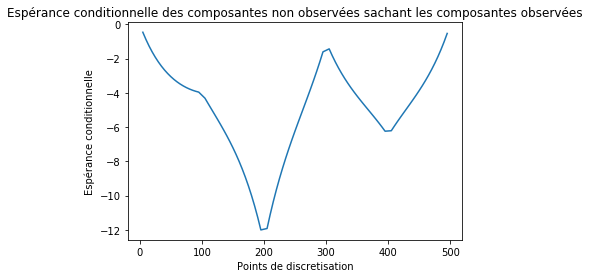

In [14]:
#On commence par calculer les 2 espérances, celle des composantes observées et non-observées:

E_I = np.array([mu]*(len(discretization_indexes)- len(observation_indexes))).T
E_O = np.array([mu]*len(observation_indexes)).T

#On définit des variables pour simplifier le calcul
Val_obs= depth.T
A= extrait_cov_inco_obs()
B= np.linalg.inv(extrait_cov_obs())
C= Val_obs- E_O


#On calcule l'espérance

E = E_I + A.dot(B).dot(C)

#On représente maintenant les données 

X= np.array([discretization[i] for i in unknown_indexes])
plt.plot(X, E)
plt.xlabel('Points de discretisation')
plt.ylabel('Espérance conditionnelle')
plt.title('Espérance conditionnelle des composantes non observées sachant les composantes observées')
plt.show()




### 6 
Avec les mêmes notations, on a la formule:

$C_{I_{|O}}= C_I - Cov(I,O)Cov(O,O)^{-1}Cov(O,I)$ pour la matrice de covariance. 

On remplace par les notations utilisées dans les questions précédentes (en notant simplement $C$ la matrice recherchée)

$C= extrait\_cov\_inco()- extrait\_cov\_inco\_obs() *extrait\_cov\_obs()^{-1} *  extrait\_cov\_inco\_obs()^t $

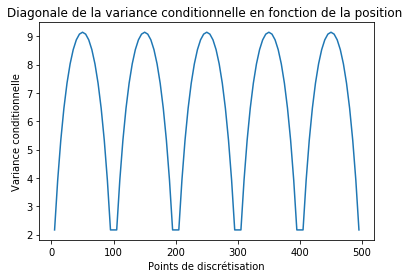

In [15]:
# On calcule C, pour se faire on définit quelques variables auxiliaires
A= extrait_cov_inco()
B= extrait_cov_inco_obs()
D= np.linalg.inv(extrait_cov_obs())

C= A- B.dot(D).dot(B.T)

#On représente sa diagonale en fonction de la position 
D= np.array([ C[i][i] for i in range(len(C))])
plt.plot(X, D)
plt.title('Diagonale de la variance conditionnelle en fonction de la position ')
plt.xlabel('Points de discrétisation')
plt.ylabel('Variance conditionnelle')
plt.show()

### Commentaire

Comme prévu par l'énoncé, si les points sont proches, la variance est faible. On peut également noter que cette variance est très élevées lorsqu'on s'éloigne des points observés: ce qui est logique puisque la connaissance de la profondeur est plus mauvaise. 

### 7)



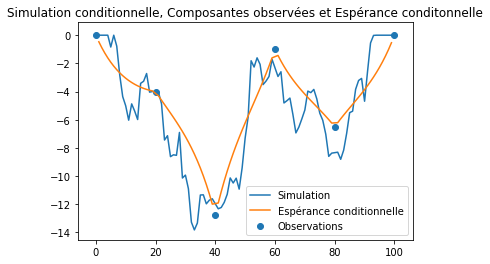

In [57]:
def simulation():
    
    L=np.linalg.cholesky(C)
    X=np.zeros(95)
    for i in range(len(X)):
        U=np.random.uniform()
        V=np.random.uniform()
        X[i]= np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    Z= E+L.dot(X)
    
    for i in range (len(Z)):
        if Z[i]>0:
            Z[i]=0
    return Z

Z=simulation()
plt.plot(unknown_indexes, Z, label='Simulation')
plt.scatter(observation_indexes, depth,label='Observations')
plt.plot(unknown_indexes, E, label='Espérance conditionnelle')
plt.legend()
plt.title('Simulation conditionnelle, Composantes observées et Espérance conditonnelle')
plt.show()


### 8)

On utilise la formule fournie par l'énoncé. 

In [72]:
def longueur_cable(pas_dis,vec_prof ):
    long=0
    for i in range (len(vec_prof)-1):
        long=long+ np.sqrt(pas_dis**2 + (vec_prof[i+1]-vec_prof[i])**2)
    return long

10.198039027185569

### 9)



In [73]:
def plusieurs_simulations(Nbre_simul):
    res=[]
    for k in range (Nbre_simul):
        L= simulation()
        S=np.zeros(101)
        for i in range(101):
            if i in observation_indexes:
                S[i]=depth[i//20]
            else: 
                S[i]= L[i - (i//20 + 1)]
           
        res.append(longeur_cable(Delta, S))
    
Cent_simulations= plusieurs_simulations(100)

TypeError: object of type 'numpy.float64' has no len()

### 10

Notons $L_i$ la longeur de câble nécessaire à la $i^{ème}$ simulation.  

On a donc que $M_n = \frac{\sum^n_{i=1}L_i}{n}$

Cherchons une relation de récurrence entre $M_n$ et $M_{n+1}$ :

$ M_{n+1}= \frac{\sum_{i=1}^{n}L_i}{n+1} + \frac{L_{i+1}}{n+1}$ , puis

$ M_{n+1}= \frac{n}{n+1}M_n + \frac{L_{i+1}}{n+1}$.

In [ ]:
def Mn(sim):
    M=0
    nombre_simul= len(sim)
    moyenne_simulation=[M]
    longueurs_simulation= longueur_cable(Delta, sim)
    for i in range (nombre_simul):
        M= i/i+1 * M + longueurs_simulation[i]/(i+1)
        moyenne_simulation.append(M)

    
        